**Uso de Algebra Lineal para Aplicar PCA en Datos del Modelo con el fin de Reducir Dimensionalidad**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Cargamos Conjunto de Datos para Analisis, Dejamos solo Columnas Numericas Predictoras, Limpiamos Valores Nulos de Variables reemplzandolo por la Mediana y Estandarizamos los Datos X

In [ ]:
## Cargamos df de Datos
df = pd.read_csv('datasets/DatosMelos.csv')

# Solo columnas numericas y de variables predictoras para poder aplicar PCA
X = df.drop(['id_persona', 'sexo', 'hta', 'dm', 'actividadfisica', 'rcv'], axis=1)

# Limpiamos valores nulos
X.fillna(X.median(), inplace=True)
n, p = X.shape
X

,edad,pas,pad,imc,peso,perimetroabdominal,testfindrisc,resultadocreatininaactual,tfgcygactual,tfgactual,albuminuria
0,21,120.0,78.0,25.315453,63.0,85.0,0,0.86,78.993056,88.259647,53.65
1,27,100.0,80.0,26.890680,59.7,85.0,3,0.86,78.993056,88.259647,53.65
2,23,110.0,70.0,21.262003,55.8,85.0,2,0.86,78.993056,88.259647,53.65
3,16,120.0,78.0,25.315453,63.0,85.0,0,0.86,78.993056,88.259647,53.65
4,30,120.0,78.0,25.315453,63.0,85.0,0,0.86,78.993056,88.259647,53.65
...,...,...,...,...,...,...,...,...,...,...,...
4995,45,127.0,88.0,26.022644,57.0,85.0,5,0.80,79.908854,92.542849,53.65
4996,24,110.0,65.0,20.625000,52.8,85.0,2,0.86,78.993056,88.259647,53.65
4997,57,160.0,78.0,29.048658,68.0,85.0,6,0.41,162.513550,113.976142,29.70
4998,39,120.0,78.0,27.887619,67.0,85.0,1,0.86,92.893249,87.532956,53.65


In [ ]:
## Estandarizamos los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Ahora se Aplicara PCA Paso a Paso

### 1. Centrar los datos: Todas las variables deben estar centradas en cero, lo cual es requisito para PCA.

In [ ]:
mean_X = np.mean(X_std, axis=0)
X_c = X_std - mean_X

### 2. Matriz de Covarianza:

In [ ]:
Sigma = np.cov(X_c, rowvar=False)

### 3. Valores y vectores propios - Eigenpares: Se resolvió el polinomio característico de Σ para obtener autovalores (λ) y autovectores (v).

In [ ]:
# Obtener eigenpares: eigenvalues te dicen cuánta varianza captura cada componente y eigenvectors te dan las direcciones (componentes principales)
eigvals, eigvecs = np.linalg.eig(Sigma)

### 4. Ordenar autovalores en orden descendente:

In [ ]:
# Ordenar los eigenpares (orden descendente)
orden = np.argsort(eigvals)[::-1]
eigvals = eigvals[orden]
eigvecs = eigvecs[:, orden]

### 5. Proyección: Selección de k componentes para ver Datos Originales en el Nuevo Espacio

In [ ]:
# Selección de k componentes
# Aquí, se proyectan los datos a k dimensiones.
k = 3 # Ejemplo:  2 componentes para verlas en un grafico
V_k = eigvecs[:, :k]
Y = X_c.dot(V_k)

print("Matriz cuyas columnas son las componentes principales:")
print(V_k)

Matriz cuyas columnas son las componentes principales:
[[ 0.40892327  0.06790253 -0.10096696]
 [ 0.34147865 -0.09706749 -0.53162807]
 [ 0.28203859 -0.10777064 -0.59755945]
 [ 0.38089434 -0.29079347  0.33969   ]
 [ 0.39162107 -0.26762255  0.3037233 ]
 [ 0.23974693 -0.13673806  0.11512212]
 [ 0.39397918 -0.02576186  0.12377088]
 [ 0.21452659  0.48826975  0.16633177]
 [-0.09195715 -0.5303925   0.15576414]
 [-0.25586226 -0.50500934 -0.1124939 ]
 [ 0.07442652  0.15508389  0.22205156]]


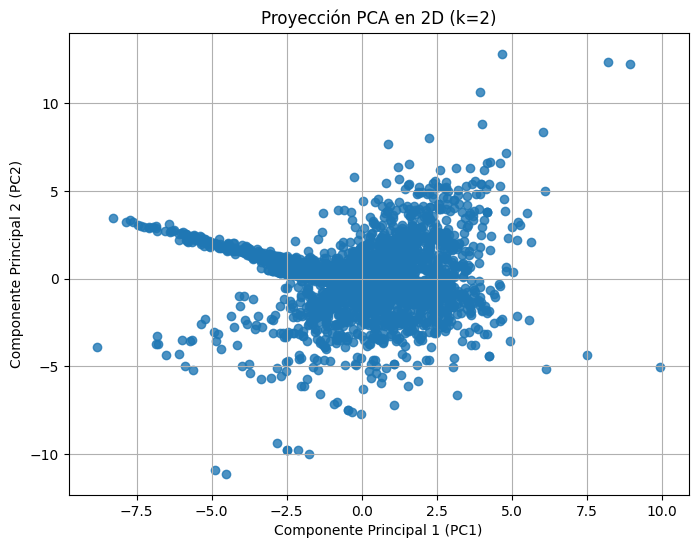

In [ ]:
## Miremos una Grafica de las Dos Componentes Principales
# Re nombramos Nombres del df Y
Y = pd.DataFrame(Y)
Y.columns = [f"PC{i+1}" for i in range(Y.shape[1])]

# Graficar proyección en 2D
plt.figure(figsize=(8, 6))
plt.scatter(Y['PC1'], Y['PC2'], alpha=0.8)
plt.title("Proyección PCA en 2D (k=2)")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.grid(True)
plt.show()

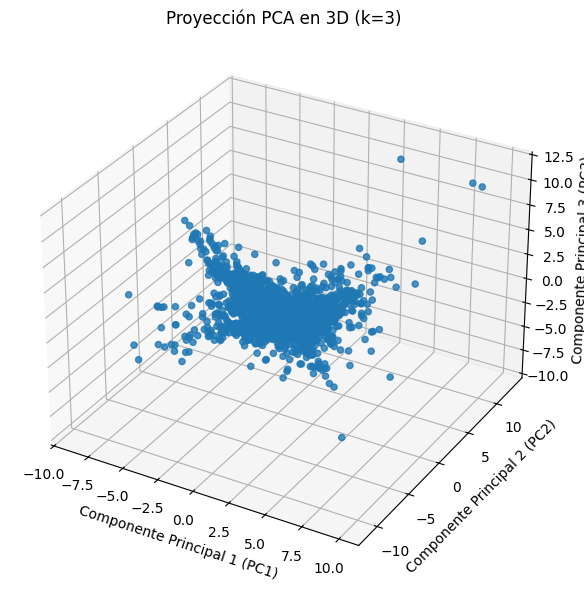

In [ ]:
# Asegúrate de que Y tenga al menos 3 componentes
Y = pd.DataFrame(Y)
Y.columns = [f"PC{i+1}" for i in range(Y.shape[1])]

# Crear figura y ejes 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
ax.scatter(Y['PC1'], Y['PC2'], Y['PC3'], alpha=0.8)

# Etiquetas
ax.set_title("Proyección PCA en 3D (k=3)")
ax.set_xlabel("Componente Principal 1 (PC1)")
ax.set_ylabel("Componente Principal 2 (PC2)")
ax.set_zlabel("Componente Principal 3 (PC3)")

plt.tight_layout()
plt.show()

### 6. Matriz de correlación entre las variables originales y las componentes principales: Se estandarizan ambas matrices (columnas con media cero y varianza uno).

In [ ]:
X_z = zscore(X, axis=0)
Y_z = zscore(Y, axis=0)
corr_matrix = np.corrcoef(X_z.T, Y_z.T)
# Extraer la parte de correlación entre variables originales (primer p filas) y componentes (últimas k columnas)
corr_orig_comp = corr_matrix[:p, p:(p+k)]
print("Matriz de correlación entre variables originales y componentes principales:")
print(corr_orig_comp)

Matriz de correlación entre variables originales y componentes principales:
[[ 0.72911515  0.10583554 -0.11321959]
 [ 0.60886056 -0.15129318 -0.5961427 ]
 [ 0.50287822 -0.16797553 -0.67007504]
 [ 0.67913922 -0.45324207  0.38091238]
 [ 0.6982651  -0.41712697  0.34058102]
 [ 0.42747168 -0.21312529  0.12909252]
 [ 0.70246964 -0.04015344  0.13879084]
 [ 0.3825035   0.76103632  0.18651662]
 [-0.1639607  -0.82669048  0.17466658]
 [-0.45620551 -0.7871273  -0.12614537]
 [ 0.13270339  0.24171981  0.24899817]]


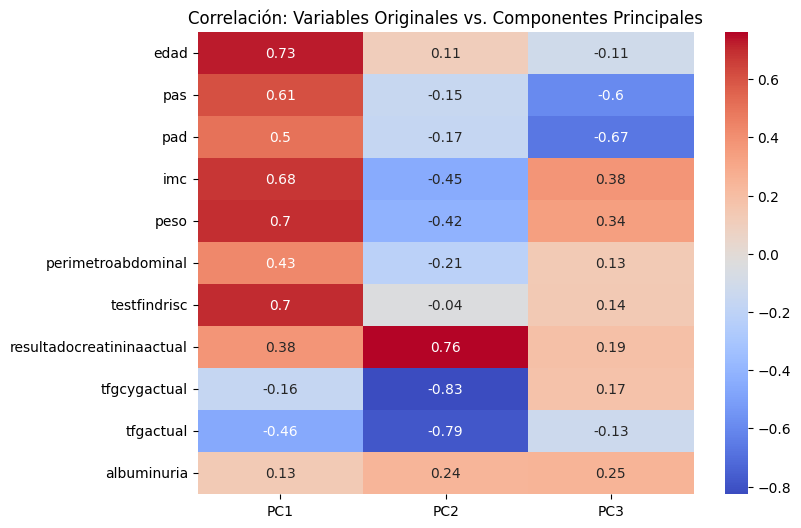

In [ ]:
# Visualizar el heatmap de la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_orig_comp, annot=True, cmap='coolwarm',
            xticklabels=[f'PC{i+1}' for i in range(k)],
            yticklabels=X.columns)
plt.title('Correlación: Variables Originales vs. Componentes Principales')
plt.show()

### 7. Scree Plot: Graficar los eigenvalores

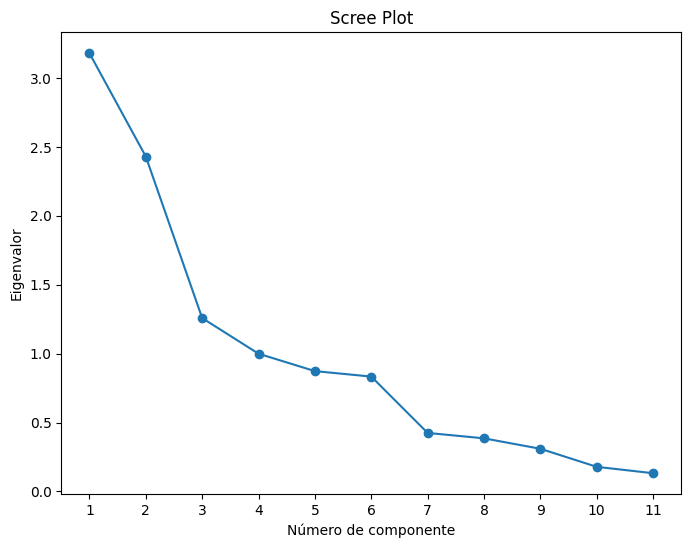

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, p+1), eigvals, marker='o', linestyle='-')
plt.xlabel('Número de componente')
plt.ylabel('Eigenvalor')
plt.title('Scree Plot')
plt.xticks(range(1, p+1))
plt.show()

### 8. Criterios para seleccionar componentes: Kaiser Criterion y Explained Variance

In [ ]:
# 1. Kaiser Criterion: Si los datos están estandarizados, se conserva componente con eigenvalor > 1
kaiser = np.sum(eigvals > 1) # Conteo de cantidad de autovalores mayores a 1
print("Número de componentes según Kaiser Criterion:", kaiser)

Número de componentes según Kaiser Criterion: 3


In [ ]:
# 2. Explained Variance: Porcentaje de varianza explicada acumulada
varianza_total = np.sum(eigvals)
varianza_explicada = eigvals / varianza_total
print("Varianza explicada por componente:", varianza_explicada)

Varianza explicada por componente: [0.28901201 0.22085053 0.11431204 0.09081937 0.07934417 0.0757371
 0.03857178 0.03500691 0.02812465 0.01622095 0.01200049]


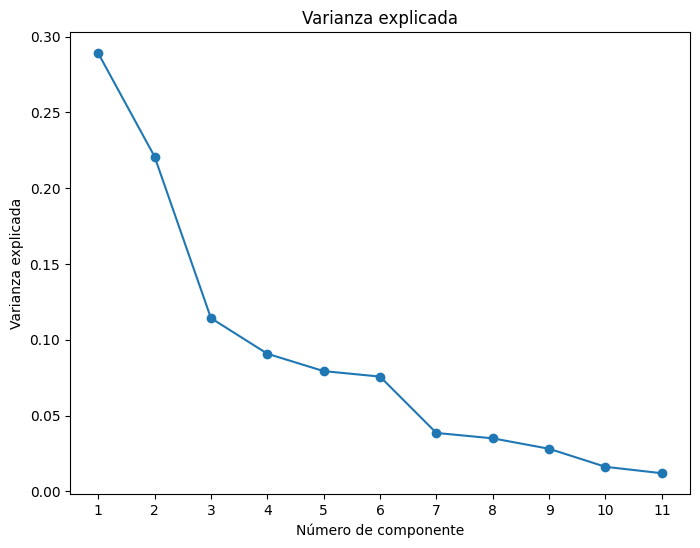

In [ ]:
# 3. Scree Plot: Graficar de la Varianza explicada por componente
plt.figure(figsize=(8,6))
plt.plot(range(1, p+1), varianza_explicada, marker='o', linestyle='-')
plt.xlabel('Número de componente')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada')
plt.xticks(range(1, p+1))
plt.show()

### Conclusiones:

#### Cantidad de Componentes

Se aplicaron dos criterios para seleccionar el número de componentes principales: el criterio de Kaiser (autovalores mayores a 1), que sugiere conservar 3 componentes, y el criterio de varianza explicada acumulada, el cual muestra que estas 3 componentes explican aproximadamente el 62% de la variabilidad total del conjunto de datos.

Se concluye conservar 3 componentes principales para este análisis, ya que representan un nivel aceptable de reducción de dimensionalidad sin una pérdida significativa de información.

#### Interpretacion de las Componentes Principales respecto a las Variables Originales

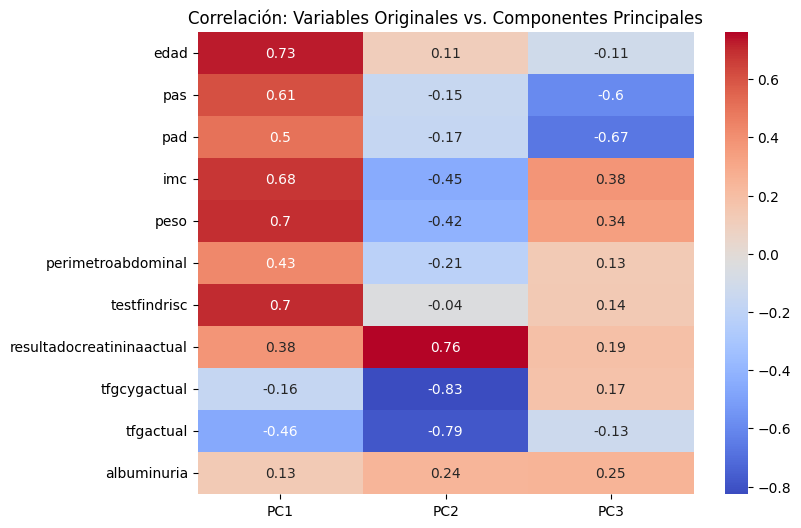

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_orig_comp, annot=True, cmap='coolwarm',
            xticklabels=[f'PC{i+1}' for i in range(k)],
            yticklabels=X.columns)
plt.title('Correlación: Variables Originales vs. Componentes Principales')
plt.show()

Componente Principal 1 (PC1): Esta componente está fuertemente correlacionada con:

- edad (0.73)
- peso (0.70)
- testfindrisc (0.70)
- imc (0.68)
- pas (0.61)

PC1 refleja un patrón metabólico y de riesgo cardiovascular, ya que está fuertemente influenciada por la edad, el índice de masa corporal (IMC), el peso, la presión arterial sistólica (PAS) y el test de Findrisc. Estos son indicadores clásicos asociados a síndrome metabólico, obesidad y riesgo de enfermedades crónicas.

Componente Principal 2 (PC2): Esta componente está fuertemente correlacionada con:

- tfgycgactual (–0.83)
- tfgactual (–0.79)
- resultado creatinina actual (0.76)

PC2 representa el eje de función renal. Tiene una fuerte correlación negativa con las tasas de filtración glomerular (TFG y TFGCYC), y positiva con la creatinina, lo cual es consistente con deterioro de la función renal. Un menor puntaje en PC2 sugiere peor función renal.

Componente Principal 3 (PC3): Esta componente está fuertemente correlacionada con:

- pad (-0.67)
- pas (-0.6)

PC3 está relacionada principalmente con la presión arterial, tanto la diastólica (PAD) como la sistólica (PAS), y ambas de forma negativa. Esto significa que cuando PC3 es más bajo, la presión arterial tiende a ser más alta. Por eso, esta componente puede interpretarse como un indicador inverso de presión arterial: valores más bajos en PC3 están asociados con presión alta, y valores más altos con presión normal o baja.

#### Creacion de Indicadores de Alerta Temprana

- PC1 está dominada por factores de riesgo metabólico y edad, por lo tanto, podría utilizarse como un indicador preventivo de riesgo cardiovascular o metabólico.
- PC2, al capturar el deterioro de la función renal, puede interpretarse como un indicador temprano de daño renal crónico, útil para identificar pacientes con riesgo de progresión renal.
- PC3, al estar relacionada con los niveles de presión arterial, puede interpretarse como un indicador temprano de alteraciones tensionales, útil para identificar personas con posible hipertensión o en riesgo de desarrollar presión alta, incluso antes de un diagnóstico clínico formal.

In [ ]:
dummie = df[['id_persona', 'sexo', 'hta', 'dm', 'actividadfisica', 'rcv']]
df_modelos = pd.concat([Y,dummie], axis=1)

df_modelos.to_csv("datos_modelos.csv", index=False)